<a href="https://colab.research.google.com/github/Anish32/data-analystics/blob/main/job_real_or_fake_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import  numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier


In [15]:
data = pd.read_csv("/content/fake_job_postings.csv")
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [16]:
data.shape

(17880, 18)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [18]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
data.dtypes

,0
job_id,int64
title,object
location,object
department,object
salary_range,object
company_profile,object
description,object
requirements,object
benefits,object
telecommuting,int64


In [20]:
data.columns


Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [21]:
data['title'].unique()


array(['Marketing Intern', 'Customer Service - Cloud Video Production',
       'Commissioning Machinery Assistant (CMA)', ...,
       'Senior Financial Analyst (Retail) ',
       'Account Director - Distribution ',
       'Project Cost Control Staff Engineer - Cost Control Exp - TX'],
      dtype=object)

In [22]:
data['location'].unique()

array(['US, NY, New York', 'NZ, , Auckland', 'US, IA, Wever', ...,
       'US, CA, los Angeles', 'CA, , Ottawa', 'GB, WSX, Chichester'],
      dtype=object)

In [23]:
data.isnull()


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,True,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,True,True,False,False,False,True,False,False,False,True,True,True,True,True,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
17876,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
17877,False,False,False,True,True,False,False,False,True,False,False,False,False,True,True,True,True,False
17878,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
data.telecommuting.value_counts()


,count
telecommuting,
0,17113
1,767


In [25]:
data.department.value_counts()


,count
department,
Sales,551
Engineering,487
Marketing,401
Operations,270
IT,225
...,...
Commercial Management / Contract Management,1
Exec,1
Marcomm,1


In [26]:
data.required_experience.value_counts()


,count
required_experience,
Mid-Senior level,3809
Entry level,2697
Associate,2297
Not Applicable,1116
Director,389
Internship,381
Executive,141


In [27]:
data.required_education.value_counts()

,count
required_education,
Bachelor's Degree,5145
High School or equivalent,2080
Unspecified,1397
Master's Degree,416
Associate Degree,274
Certification,170
Some College Coursework Completed,102
Professional,74
Vocational,49


In [28]:
data.salary_range.value_counts()

,count
salary_range,
0-0,142
40000-50000,66
30000-40000,55
25000-30000,37
45000-67000,37
...,...
15-25,1
60-75,1
27500-36000,1


In [29]:
data.industry.value_counts()

,count
industry,
Information Technology and Services,1734
Computer Software,1376
Internet,1062
Marketing and Advertising,828
Education Management,822
...,...
Shipbuilding,1
Sporting Goods,1
Museums and Institutions,1


In [30]:
data.function.value_counts()

,count
function,
Information Technology,1749
Sales,1468
Engineering,1348
Customer Service,1229
Marketing,830
Administrative,630
Design,340
Health Care Provider,338
Other,325


In [31]:
data['fraudulent'].value_counts()

,count
fraudulent,
0,17014
1,866


In [32]:
data['fraudulent'].unique()


array([0, 1])

In [33]:
data.isnull().sum()

,0
job_id,0
title,0
location,346
department,11547
salary_range,15012
company_profile,3308
description,1
requirements,2696
benefits,7212
telecommuting,0


In [34]:
data.duplicated().sum()

0

In [47]:
numerical=[col for col in data.columns if data[col].dtypes !='object']
print(len(numerical))
print(numerical)

5
['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']


In [48]:
data[numerical].describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

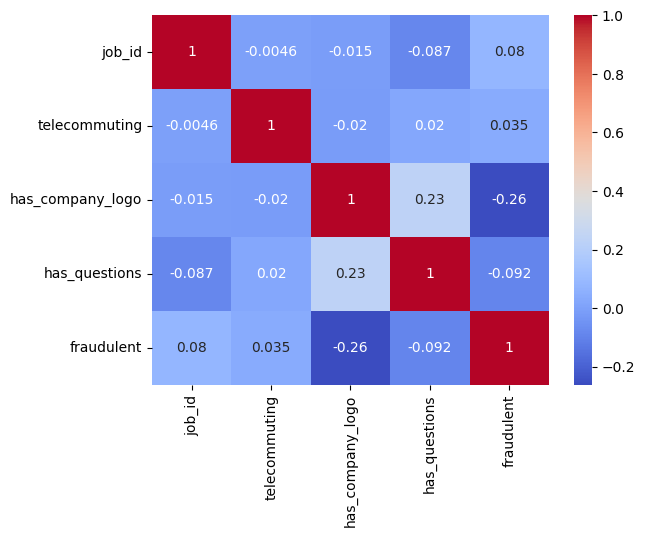

In [49]:
sns.heatmap(data[numerical].corr(), cmap='coolwarm', annot=True)

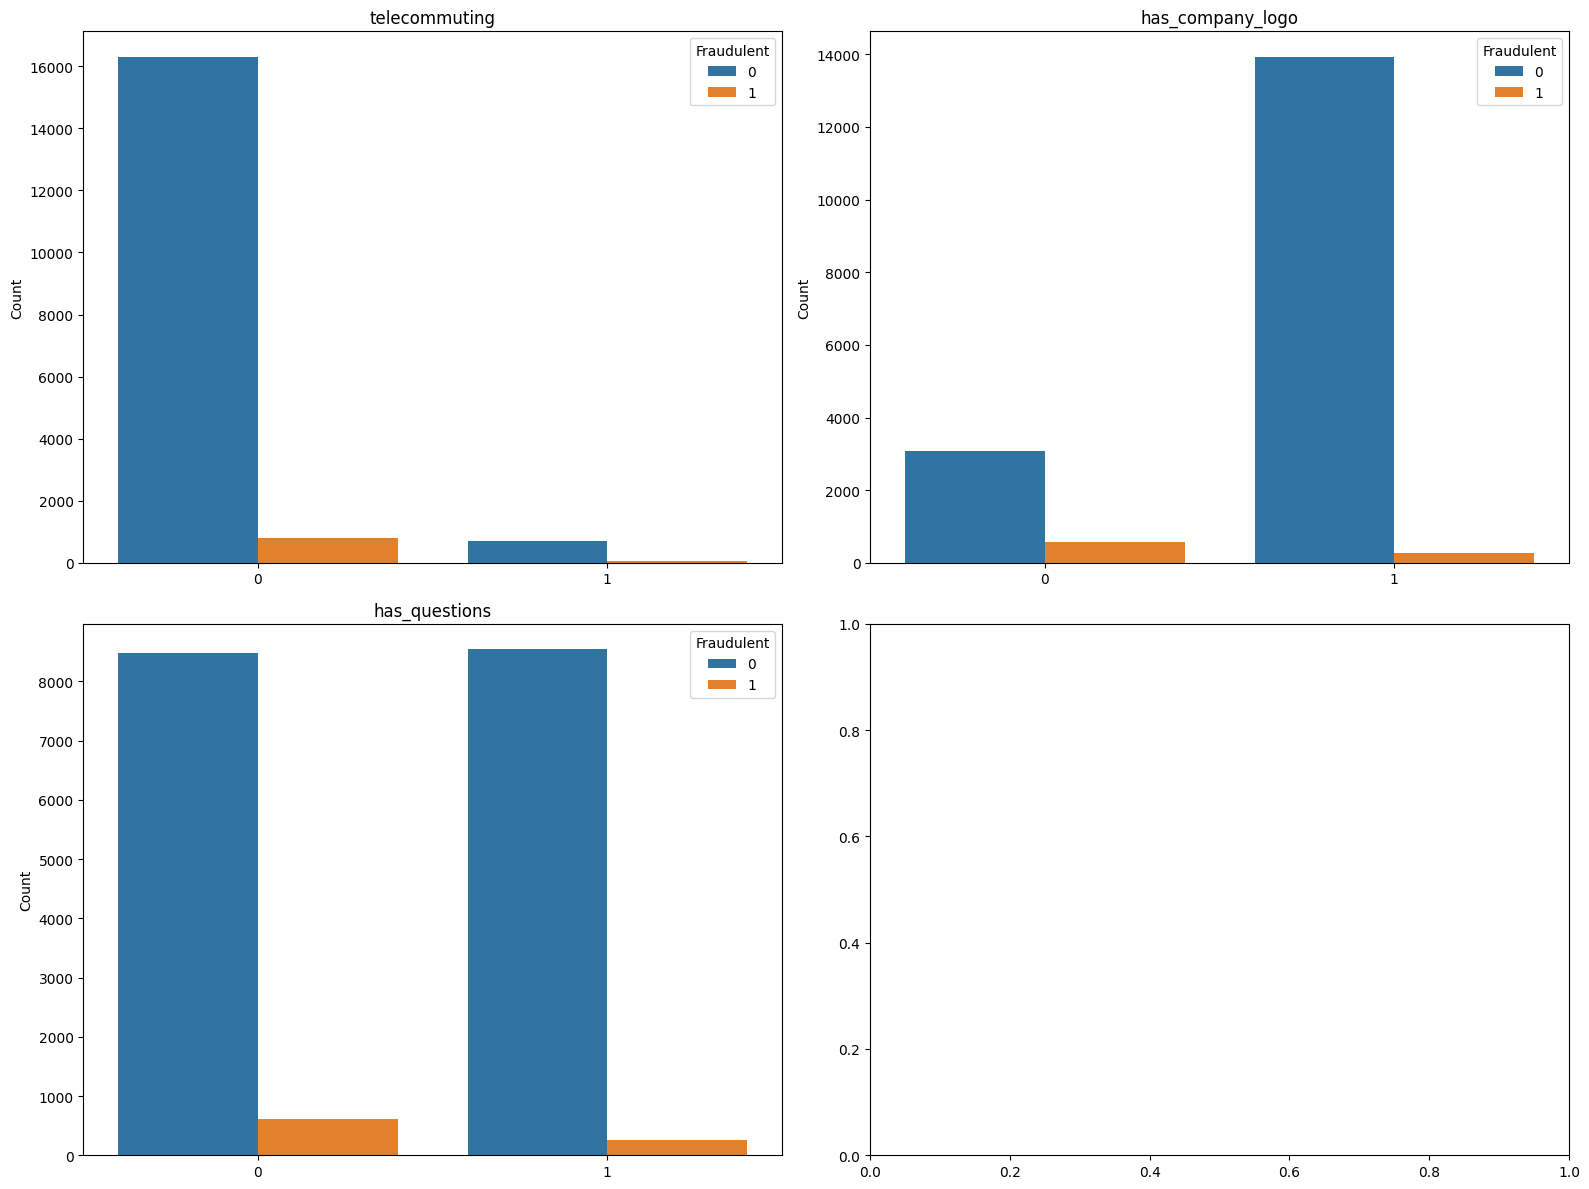

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

titles = ['telecommuting', 'has_company_logo', 'has_questions']

for ax, title in zip(axes.flatten(), titles):
    sns.countplot(x=title, hue='fraudulent', data=data, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.legend(title='Fraudulent', loc='upper right')

plt.tight_layout()
plt.show()

<Axes: >

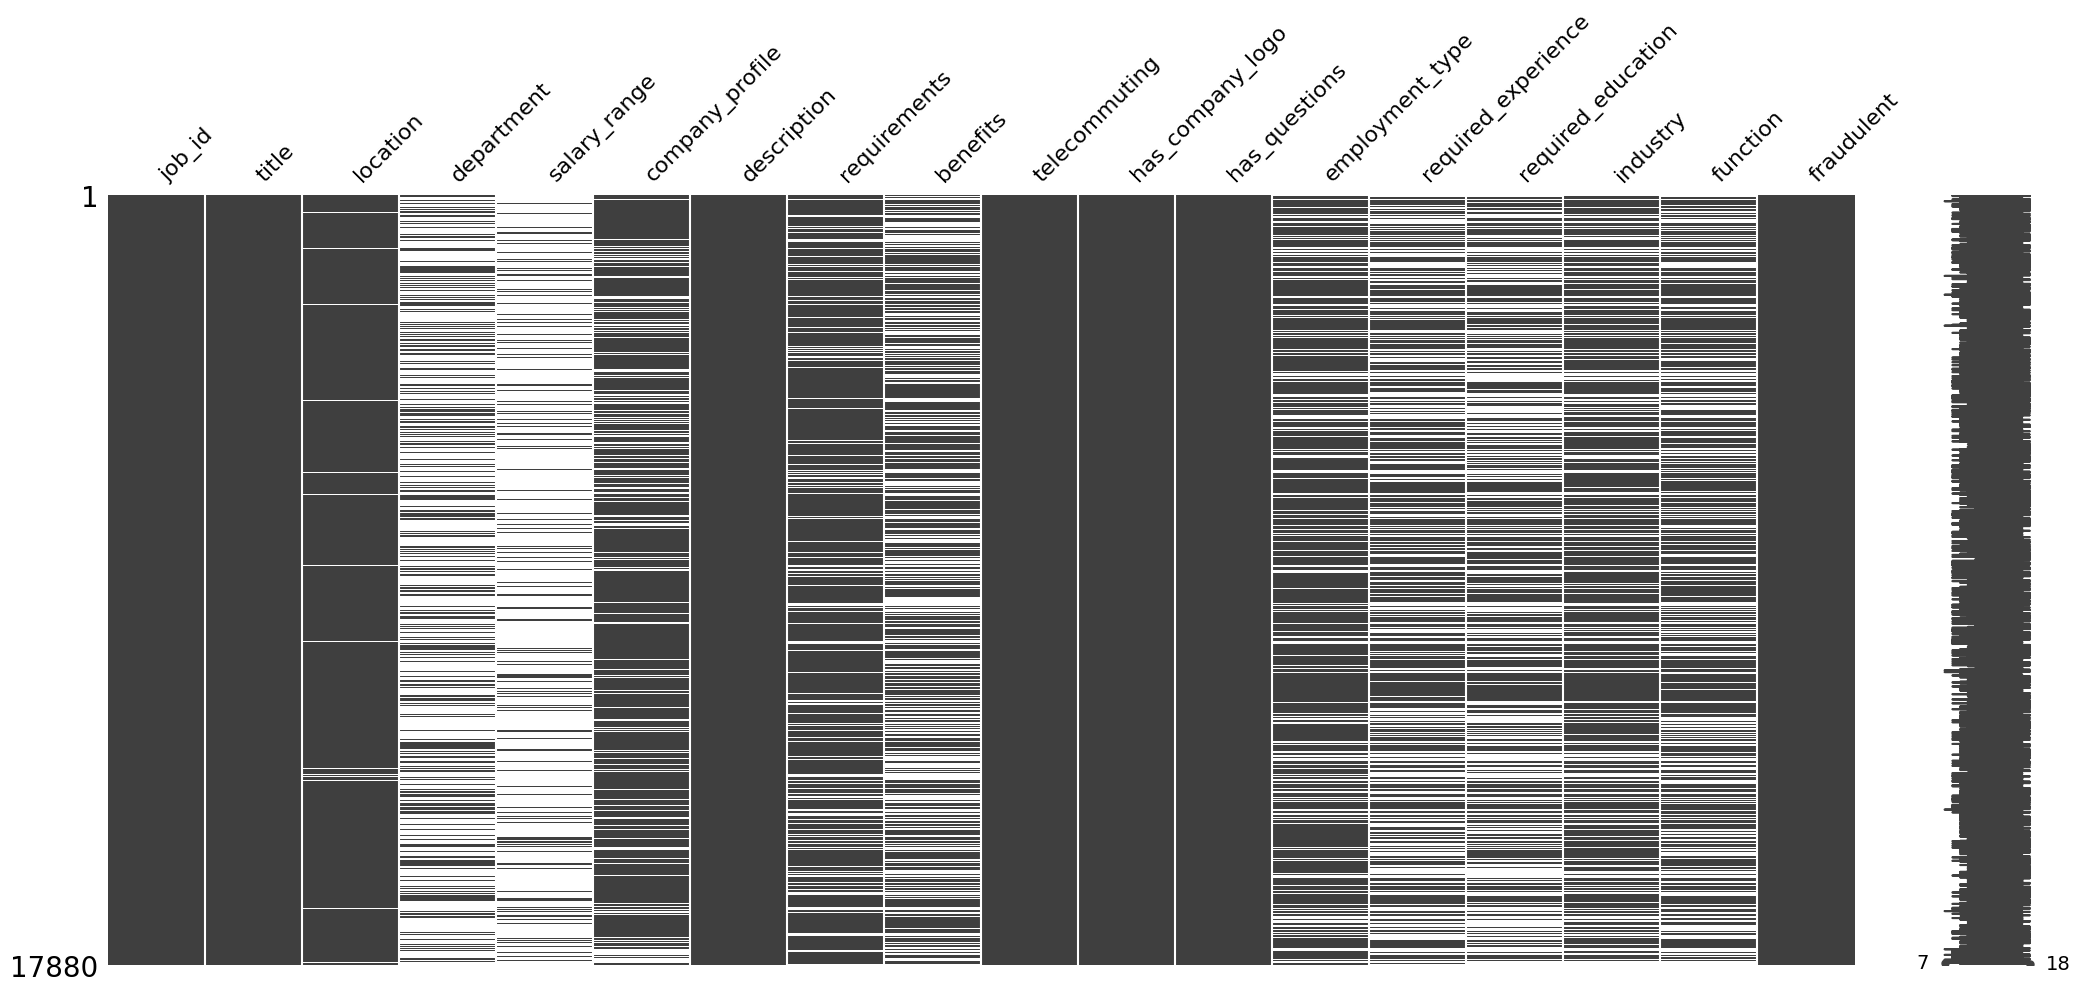

In [35]:
import missingno
missingno.matrix(data)

Text(0, 0.5, 'No. of Jobs')

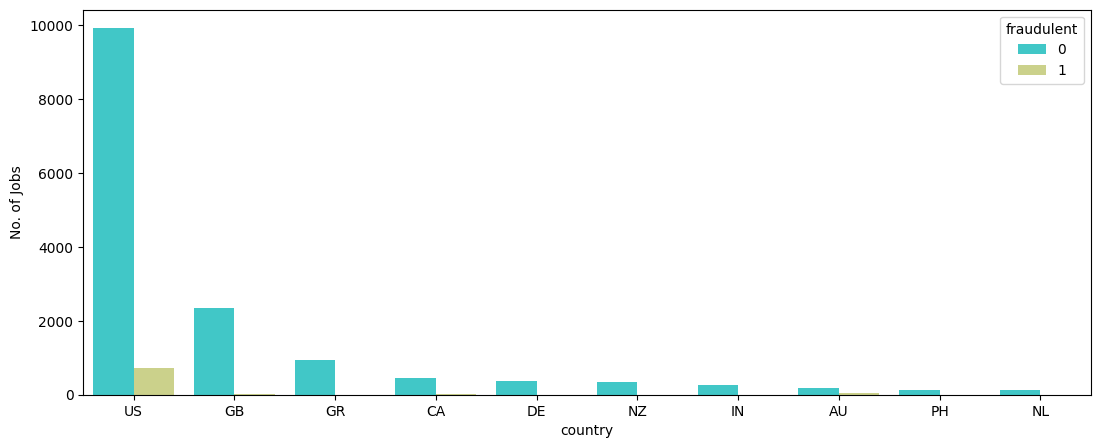

In [58]:
plt.figure(figsize=(13,5))
data['country'] = data['location'].str.split(',').str[0]
country = data['country'].value_counts().nlargest(10).index.tolist()
ax=sns.countplot(data=data, x='country', hue='fraudulent', order=country, palette='rainbow')
ax.set_ylabel('No. of Jobs')

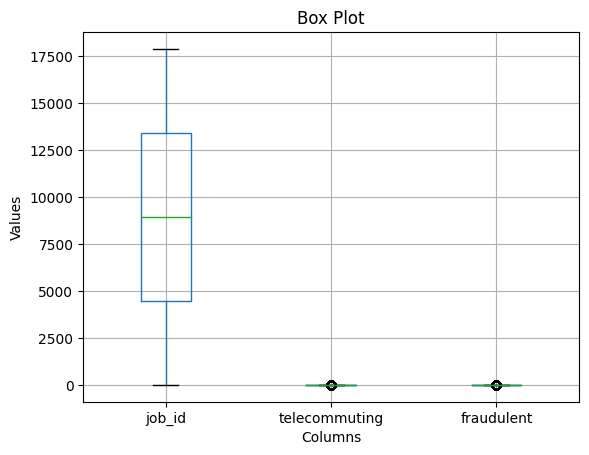

In [36]:
columns_to_plot = ['job_id', 'telecommuting','fraudulent']

data[columns_to_plot].boxplot()

plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box Plot')

plt.show()

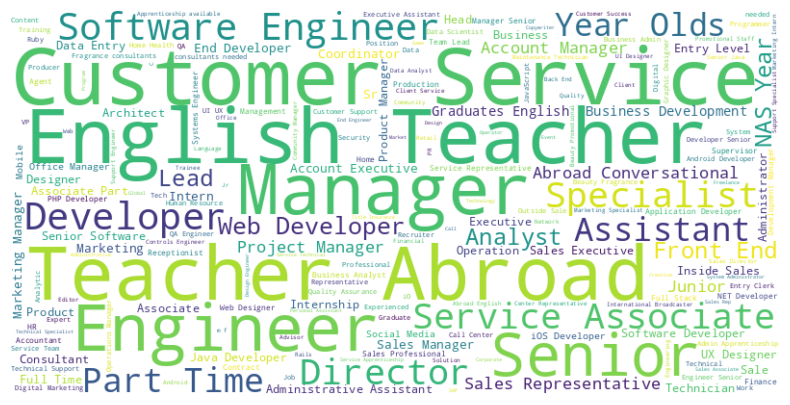

In [37]:
text = " ".join(title for title in data.title)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [38]:
data_f = data[data['fraudulent'] == 1]  #fraudulent
data_nf = data[data['fraudulent'] == 0]

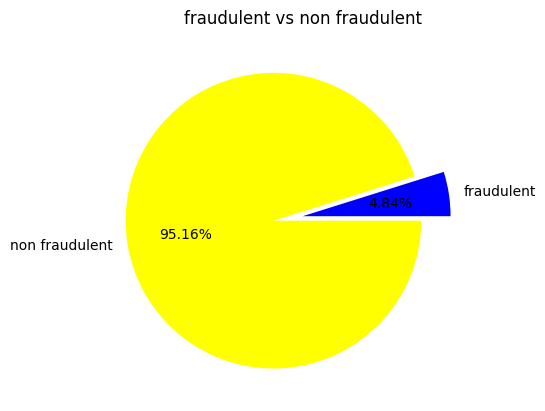

In [39]:
plt.title('fraudulent vs non fraudulent')
plt.pie([data_f.shape[0], data_nf.shape[0]],
        labels=['fraudulent', 'non fraudulent'],
        explode=(0, 0.2),
        autopct='%1.2f%%',
       colors=['blue','yellow'])
plt.show()

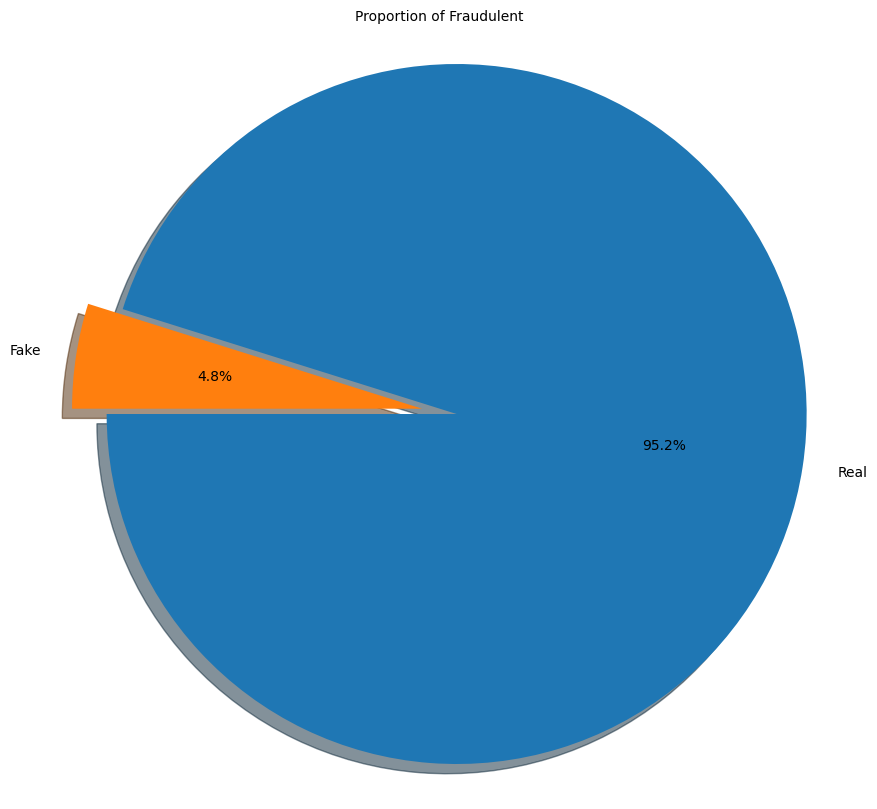

In [65]:
labels = 'Real', 'Fake'
sizes = [data.fraudulent[data['fraudulent']== 0].count(), data.fraudulent[data['fraudulent']== 1].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')
plt.title("Proportion of Fraudulent", size = 10)
plt.show()

In [76]:
#Visulaization of Important features
feature data=pd.DataFrame(feature_dict,index=[0])
feature_data.T.plot.line(title="EmploymentScamAegean Dataset - Feature Importance",legend=False,color='orange');

SyntaxError: invalid syntax (<ipython-input-76-02bc0f92e752>, line 2)

In [40]:
us_jobs = data[data['location'] == 'US']

common_titles = us_jobs['title'].value_counts()

most_common_title = common_titles.idxmax()
most_common_title

'Customer Service Associate '

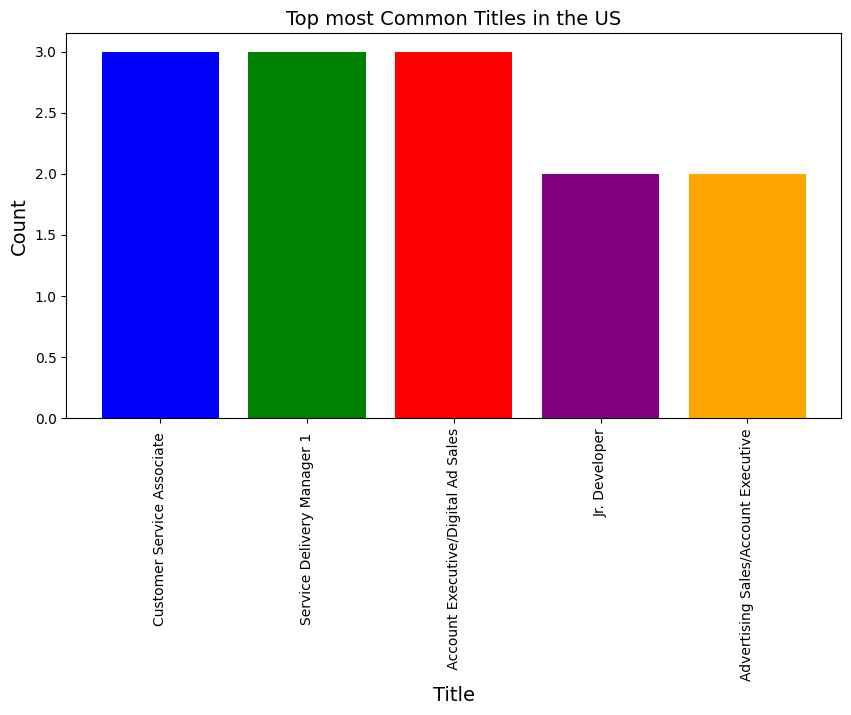

In [41]:
top_5_titles = common_titles.head(5)

plt.figure(figsize=(10, 5))
plt.bar(top_5_titles.index, top_5_titles, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title("Top most Common Titles in the US", fontsize=14)
plt.xlabel("Title", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [42]:
fake_jobs = data[data['fraudulent'] == 1]
department_counts = fake_jobs['department'].value_counts()
most_fake_jobs_department = department_counts.idxmax()
most_fake_jobs_department

'Engineering'

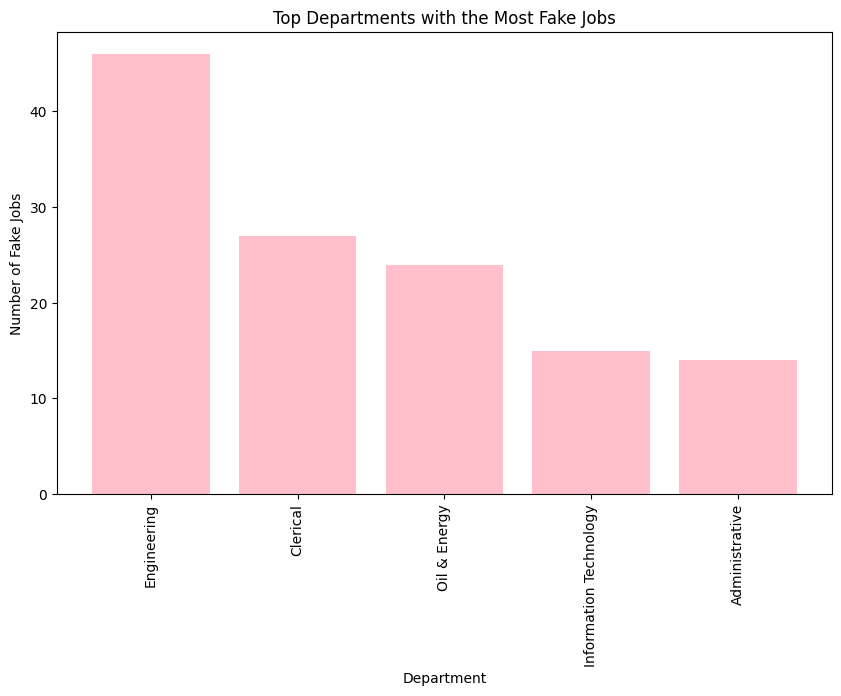

In [43]:
top_departments = department_counts.head(5)
plt.figure(figsize=(10, 6))
plt.bar(top_departments.index, top_departments.values,color='pink')
plt.xlabel('Department')
plt.ylabel('Number of Fake Jobs')
plt.title('Top Departments with the Most Fake Jobs')
plt.xticks(rotation=90)
plt.show()

In [44]:
salary_range = data['salary_range']
departments = data['department']
locations = data['location']
highest_range_value = 0
highest_range_department = None
highest_range_row = None
pattern = r'(\d+)-(\d+)'

for i, (range_str, department, location) in enumerate(zip(salary_range, departments, locations)):
    # Check if the salary range is a string
    if isinstance(range_str, str) and location == 'GB':
        match = re.match(pattern, range_str)
        if match:
            upper = int(match.group(2))
            if upper > highest_range_value:
                highest_range_value = upper
                highest_range_department = department
                highest_range_row = data.iloc[i]

print(f"The highest salary range value in the UK is {highest_range_value}")
print(f"The department with the highest range value in the UK is: {highest_range_department}")
print(f"The complete row with the highest range value in the UK is:")
print(highest_range_row)

The highest salary range value in the UK is 65000
The department with the highest range value in the UK is: nan
The complete row with the highest range value in the UK is:
job_id                                                              4400
title                                   New Business Development Manager
location                                                              GB
department                                                           NaN
salary_range                                                 36000-65000
company_profile        Apps for Good (#URL_937118d268463f038aabd86006...
description            At Apps for Good, we are a dynamic team of pas...
requirements           We would like you to have:- A minimum of five ...
benefits               Remuneration: £36,000 pro rata - plus a great ...
telecommuting                                                          0
has_company_logo                                                       1
has_questions            